<a href="https://colab.research.google.com/github/Tien84/Face-Detection/blob/master/demoSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [8]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 38.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [9]:
!pip install pyramid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 5.2 MB/s 
     |████████████████████████████████| 114 kB 38.0 MB/s 
     |████████████████████████████████| 251 kB 48.7 MB/s 


In [10]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
from statsmodels.tsa.seasonal import seasonal_decompose



In [12]:
def parser(s):
  return datetime.strptime(s, '%Y-%m-%d')

In [13]:
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#df = pd.read_csv('/content/driver/My Drive/LSTM_Model/AAPL.csv', parse_dates=[0], squeeze=True, date_parser=parser)
df = pd.read_csv('/content/driver/My Drive/LSTM_Model/BitcoinDataDaily.csv', parse_dates=['Date'], index_col='Date')
#df.tail(2558)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-09,270.826996,272.334991,267.085999,269.227997,269.227997,40301200
2015-07-10,269.156006,294.591003,268.802002,284.894012,284.894012,100390000
2015-07-11,284.880005,298.506012,283.529999,293.114990,293.114990,41109900
2015-07-12,293.140015,314.394012,292.505005,310.867004,310.867004,56405000
2015-07-13,310.826996,310.947998,281.010986,292.053986,292.053986,62053900
...,...,...,...,...,...,...
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2558 entries, 2015-07-09 to 2022-07-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2558 non-null   float64
 1   High       2558 non-null   float64
 2   Low        2558 non-null   float64
 3   Close      2558 non-null   float64
 4   Adj Close  2558 non-null   float64
 5   Volume     2558 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.9 KB


In [15]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df=df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-07-09,270.826996,272.334991,267.085999,269.227997,269.227997,40301200
2015-07-10,269.156006,294.591003,268.802002,284.894012,284.894012,100390000
2015-07-11,284.880005,298.506012,283.529999,293.114990,293.114990,41109900
2015-07-12,293.140015,314.394012,292.505005,310.867004,310.867004,56405000
2015-07-13,310.826996,310.947998,281.010986,292.053986,292.053986,62053900
...,...,...,...,...,...,...
2022-07-05,20225.353516,20635.466797,19341.232422,20190.115234,20190.115234,26715546990
2022-07-06,20194.619141,20595.529297,19823.511719,20548.246094,20548.246094,24598943708
2022-07-07,20547.814453,21771.816406,20296.103516,21637.587891,21637.587891,25814972520


In [16]:
start_date = datetime(2015,7,9)
end_date = datetime(2022,7,9)
lim_df = df[start_date:end_date]['Adj Close']
lim_df

Date
2015-07-09      269.227997
2015-07-10      284.894012
2015-07-11      293.114990
2015-07-12      310.867004
2015-07-13      292.053986
                  ...     
2022-07-05    20190.115234
2022-07-06    20548.246094
2022-07-07    21637.587891
2022-07-08    21731.117188
2022-07-09    21515.798828
Freq: D, Name: Adj Close, Length: 2558, dtype: float64

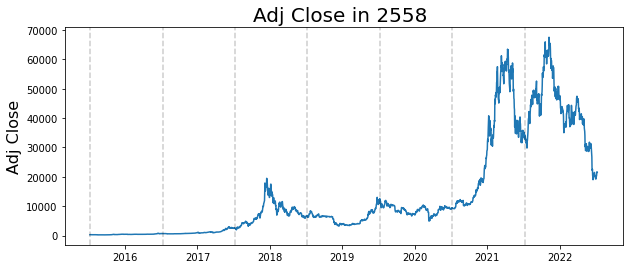

In [18]:
plt.figure(figsize=(10,4))
plt.plot(lim_df)
plt.title('Adj Close in 2558 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-07-09'), color='k', linestyle='--', alpha=0.2)
plt.show()

In [19]:
#first_diff = lim_df.diff()[1:]
first_diff = lim_df.diff()

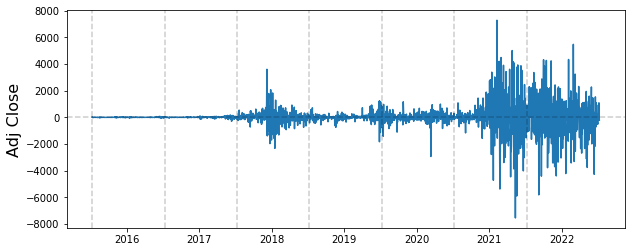

In [21]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
#plt.title('Adj Close in 763 ', fontsize=20)
plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-07-09'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [23]:
import numpy as np

# Get training and testing sets
train_end = datetime(2020,6,1)
test_end = datetime(2022,7,9)

#train_data = list(df[:train_end]['Adj Close'])
#test_data = df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = lim_df[:train_end]['Adj Close']
#test_data = lim_df[train_end + timedelta(days=1):test_end]['Adj Close']

#train_data = list(lim_df[:train_end]['Adj Close'])
#test_data = list(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
train_data = lim_df[:train_end]
test_data = lim_df[train_end + timedelta(days=1):test_end]


#train_data = list(lim_df[:1345]['Adj Close'])
#test_data = list(lim_df[1345:]['Adj Close'])

#test_data = list(df[train_end:test_end]['Adj Close'])

#train_data = df[df.index < '2017-05-05'], df[df.index >= '2012-01-03']
#test_data = df[df.index < '2020-01-09'], df[df.index >= '2017-05-05']

#train_data, test_data = lim_df[lim_df.index < '2012-01-03'], lim_df[lim_df.index >= '2020-01-09']
#print('train shape: ', train_data.shape)
#print('test shape: ', test_data.shape)
print (len(train_data))
print(len(test_data))



1790
768


In [24]:
#ACF plot and PACF plot with 99% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#n_test_ob = len(test_data)
#n_test_ob
#plot_acf(df['Adj Close'], lags=20, alpha=0.01)
#plot_acf(test_data, lags= 16, alpha=0.01)
#plot_acf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])
#plot_pacf(lim_df[train_end + timedelta(days=1):test_end]['Adj Close'])


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


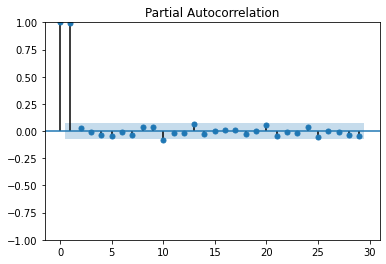

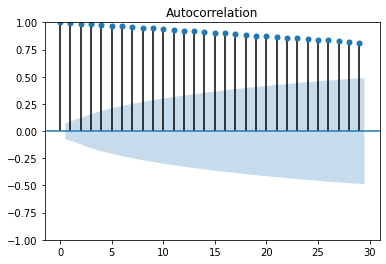

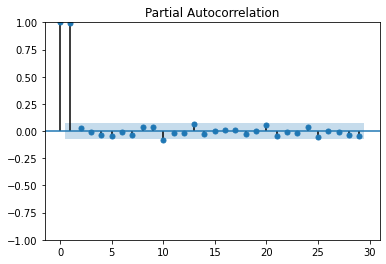

In [25]:
#ACF plot and PACF plot with 95% Confidence Intervals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#Differencing
data_df = df.diff()
data_df = data_df.dropna()
data_df
#plot_acf(df['Adj Close'], lags=20, alpha=0.05)
#plot_acf(test_data, lags=20, alpha=0.05)
#plot_pacf(test_data, lags=20, alpha=0.05)
plot_acf(test_data)
plot_pacf(test_data)

In [26]:
#ACF values and PACF values
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
#print(acf(df['Adj Close']))
print(acf(test_data))
print(pacf(test_data))

[1.         0.99398792 0.98826167 0.98248906 0.97644312 0.9700238
 0.96356452 0.95677877 0.95040591 0.94437908 0.9375654  0.93066127
 0.92372286 0.91738267 0.91074568 0.90417729 0.89771251 0.89142701
 0.8849533  0.87854669 0.87260953 0.86623027 0.8599433  0.85351174
 0.8474408  0.84085111 0.83442157 0.82779416 0.82092243]
[ 1.00000000e+00  9.95283859e-01  2.67827881e-02 -7.57138018e-03
 -3.30736384e-02 -4.55088137e-02 -1.05210141e-02 -3.82329894e-02
  4.06238452e-02  3.85968069e-02 -8.45043940e-02 -1.95392953e-02
 -1.35896431e-02  6.33443996e-02 -2.82490589e-02  2.30531537e-03
  1.35866285e-02  7.54201713e-03 -3.02125837e-02  1.35238431e-03
  5.65914984e-02 -4.71186700e-02 -9.91923245e-03 -1.94582298e-02
  3.74202411e-02 -5.71063517e-02 -7.12632979e-04 -1.20467508e-02
 -3.20343168e-02]


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


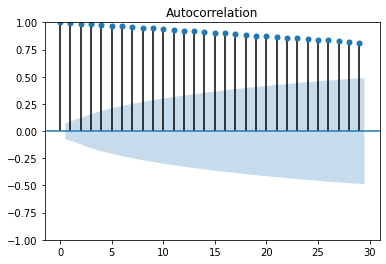

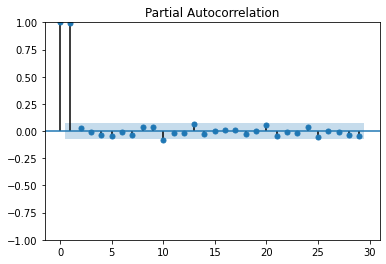

In [27]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#Seasonal differencing
data_df = df.diff(12)
data_df = data_df.dropna()

#plot ACF
#plot_acf(data_df['Adj Close'], lags= 30)
#plot_acf(data_df['Adj Close'])
plot_acf(test_data)
#plot PACF
#plot_pacf(data_df['Adj Close'], lags=30)
#plot_pacf(data_df['Adj Close'])
plot_pacf(test_data)
plt.show()

In [28]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
model_sarima = auto_arima(test_data, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=24,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

print(model_sarima.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[24]             : AIC=inf, Time=17.61 sec
 ARIMA(0,1,0)(0,1,0)[24]             : AIC=13431.245, Time=0.28 sec
 ARIMA(1,1,0)(1,1,0)[24]             : AIC=13238.928, Time=6.92 sec
 ARIMA(0,1,1)(0,1,1)[24]             : AIC=inf, Time=7.37 sec
 ARIMA(1,1,0)(0,1,0)[24]             : AIC=13433.222, Time=0.30 sec
 ARIMA(1,1,0)(2,1,0)[24]             : AIC=13193.623, Time=18.60 sec
 ARIMA(1,1,0)(2,1,1)[24]             : AIC=inf, Time=30.70 sec
 ARIMA(1,1,0)(1,1,1)[24]             : AIC=inf, Time=10.74 sec
 ARIMA(0,1,0)(2,1,0)[24]             : AIC=13192.997, Time=4.92 sec
 ARIMA(0,1,0)(1,1,0)[24]             : AIC=13237.252, Time=2.18 sec
 ARIMA(0,1,0)(2,1,1)[24]             : AIC=inf, Time=26.25 sec
 ARIMA(0,1,0)(1,1,1)[24]             : AIC=inf, Time=7.16 sec
 ARIMA(0,1,1)(2,1,0)[24]             : AIC=13193.624, Time=18.73 sec
 ARIMA(1,1,1)(2,1,0)[24]             : AIC=inf, Time=23.06 sec
 ARIMA(0,1,0)(2,1,0)[24] intercept   : A

In [29]:
model_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  768
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 24)   Log Likelihood               -6593.499
Date:                            Sat, 09 Jul 2022   AIC                          13192.997
Time:                                    13:52:08   BIC                          13206.829
Sample:                                         0   HQIC                         13198.329
                                            - 768                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L24      -0.5999      0.026    -23.521      0.000      -0.650      -0.550
ar.S.L48      -0.2460      0.027     -9.177      0.000      -0.299      -0.193
sigma2      3.157e+06   1.21e+05     26.171      0.000    2.92e+06    3.39e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               152.96
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

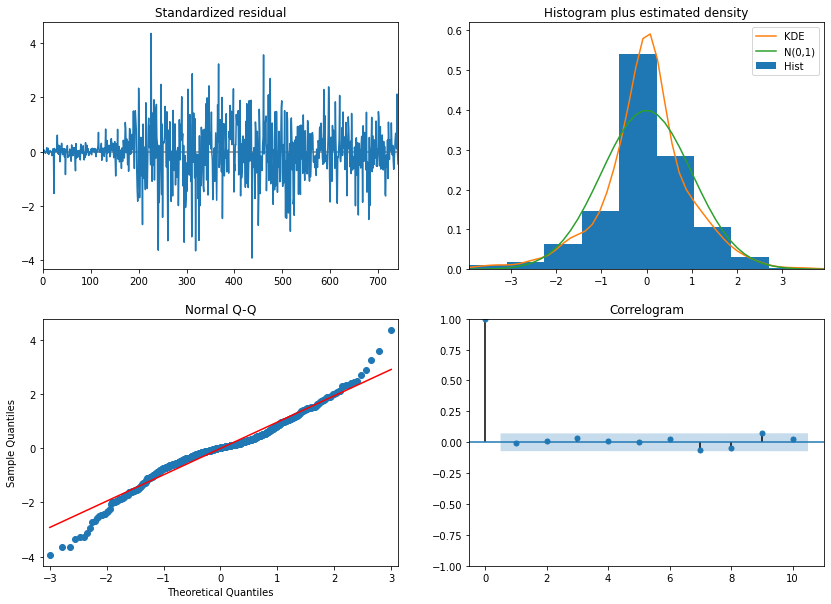

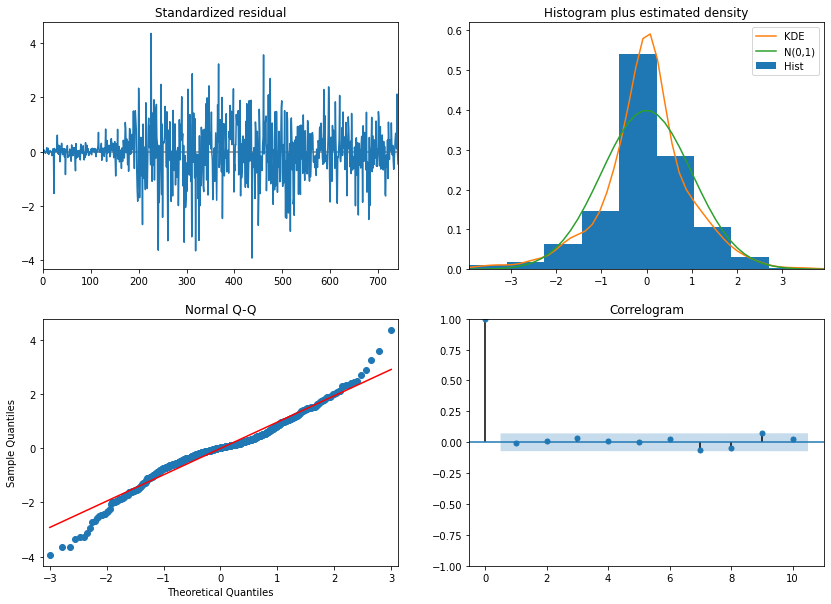

In [30]:
model_sarima.plot_diagnostics(figsize=(14,10))

In [31]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(2,1,0,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                  768
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 12)   Log Likelihood               -6483.130
Date:                             Sat, 09 Jul 2022   AIC                          12976.261
Time:                                     13:53:02   BIC                          12999.226
Sample:                                 06-02-2020   HQIC                         12985.121
                                      - 07-09-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9823      0.018     53.179      0.000       0.946       1.019
ma.L1         -0.9970      

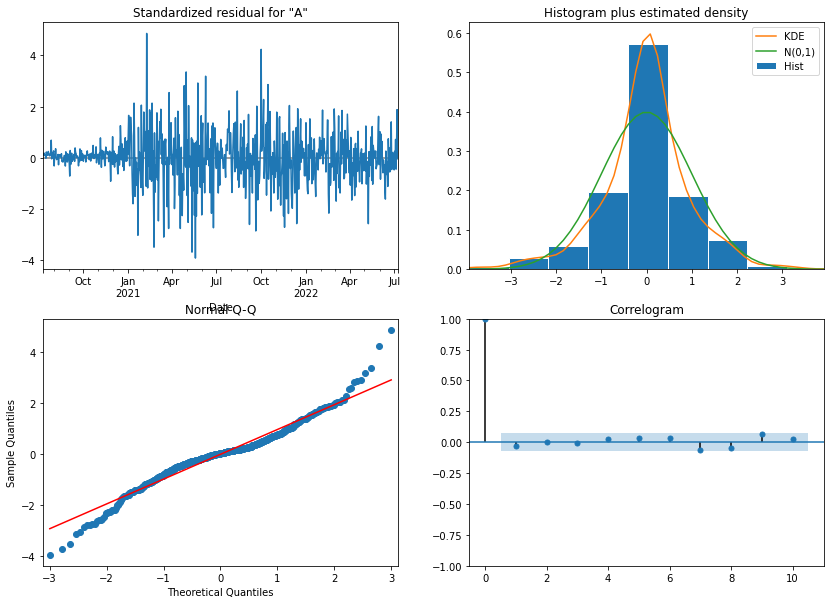

In [32]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [33]:
import statsmodels.api as sm
import warnings
import itertools

# define model
#model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
model = sm.tsa.statespace.SARIMAX(test_data, order=(1,1,1),
                                  seasonal_order=(2,1,0,24),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
results = model.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Adj Close   No. Observations:                  768
Model:             SARIMAX(1, 1, 1)x(2, 1, [], 24)   Log Likelihood               -6178.081
Date:                             Sat, 09 Jul 2022   AIC                          12366.162
Time:                                     13:54:23   BIC                          12388.874
Sample:                                 06-02-2020   HQIC                         12374.945
                                      - 07-09-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7565      1.137      0.665      0.506      -1.472       2.985
ma.L1         -0.7479      

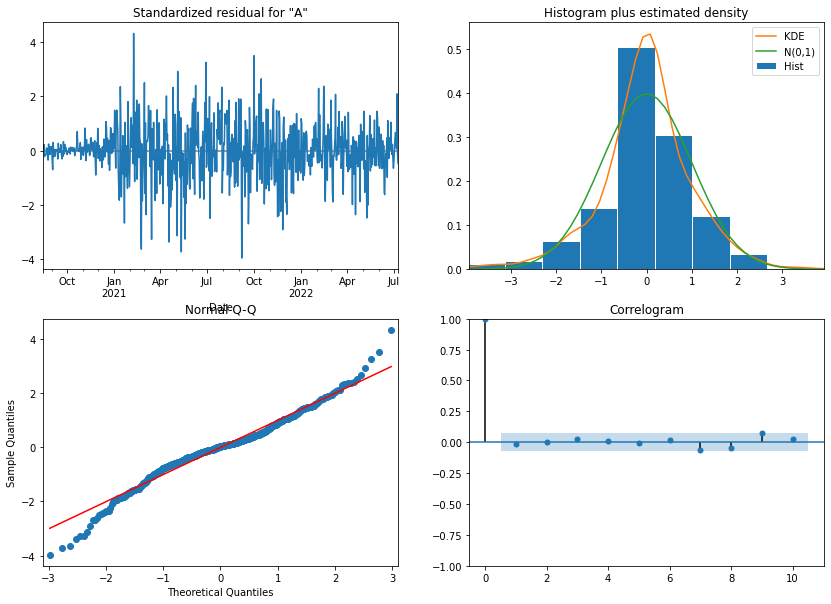

In [34]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

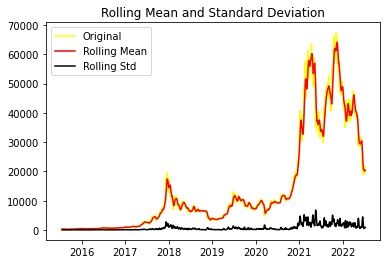

Results of fuller test
Test Statistics                  -1.537043
p-value                           0.515114
No. of lags used                 27.000000
Number of observations used    2530.000000
critical value (1%)              -3.432937
critical value (5%)              -2.862683
critical value (10%)             -2.567379
dtype: float64


In [35]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df['Adj Close'])

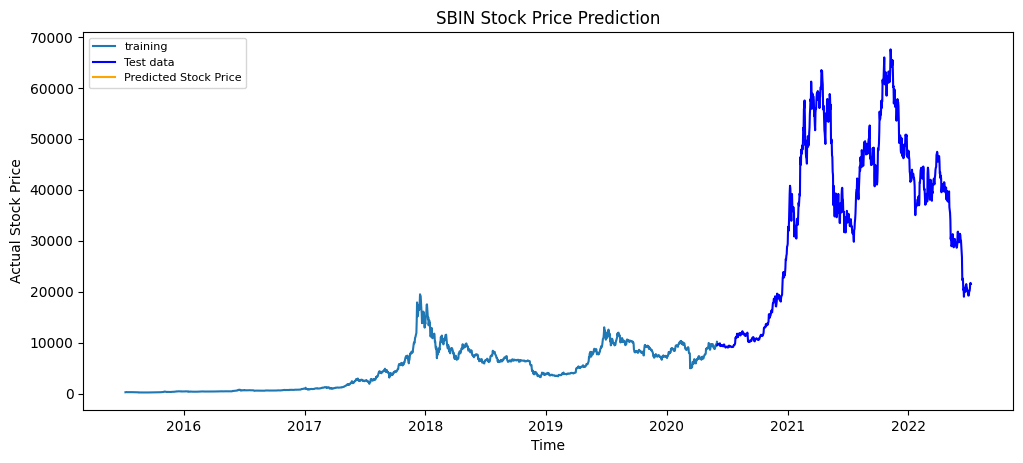

In [36]:
# Forecast
#fc, se, conf = results.forecast(519, alpha=0.05)  # 95% confidence
fc = results.forecast(768, alpha=0.05)
#fc = results.forecast(len(test_data))
conf = results.forecast(len(test_data))

#fc_series = pd.Series(fc, index=test_data.index)
fc_series = pd.Series(fc,lim_df[train_end:], df['Adj Close'])

lower_series = pd.Series(lim_df[: train_end], df['Adj Close'])
upper_series = pd.Series(lim_df[train_end:], df['Adj Close'])

#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)


#lower_series = pd.Series(lim_df[: train_end], index=test_data.index)
#upper_series = pd.Series(lim_df[train_end:], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [37]:
print(len(test_data))
test_data

768


Date
2020-06-02     9529.803711
2020-06-03     9656.717773
2020-06-04     9800.636719
2020-06-05     9665.533203
2020-06-06     9653.679688
                  ...     
2022-07-05    20190.115234
2022-07-06    20548.246094
2022-07-07    21637.587891
2022-07-08    21731.117188
2022-07-09    21515.798828
Freq: D, Name: Adj Close, Length: 768, dtype: float64

In [38]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Get the predictions and residuals
#pred = results.forecast(len(test_data))
pred = results.forecast(768)
#predictions = model_sarima.predict(len(test_data))
print(pred)

#pred = pd.Series(predictions, index=test_data.index)
#predictions = pd.Series(predictions, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
predictions = pd.Series(pred.values, index=df[train_end + timedelta(days=1):test_end].index)
#predictions = pd.Series(pred, index=df[train_end + timedelta(days=1):test_end]['Adj Close'].index)
#predictions
#predictions = pd.Series(pred, index=df[1345:]['Adj Close'].index)
predictions
#residuals = test_data - predictions
#residuals =  predictions - test_data
#residuals


2022-07-10     19950.277599
2022-07-11     19964.907244
2022-07-12     19575.339425
2022-07-13     20083.127316
2022-07-14     19676.673058
                  ...      
2024-08-11   -118642.950643
2024-08-12   -118757.239026
2024-08-13   -119733.003576
2024-08-14   -119743.350614
2024-08-15   -119615.394978
Freq: D, Name: predicted_mean, Length: 768, dtype: float64


Date
2020-06-02     19950.277599
2020-06-03     19964.907244
2020-06-04     19575.339425
2020-06-05     20083.127316
2020-06-06     19676.673058
                  ...      
2022-07-05   -118642.950643
2022-07-06   -118757.239026
2022-07-07   -119733.003576
2022-07-08   -119743.350614
2022-07-09   -119615.394978
Freq: D, Length: 768, dtype: float64

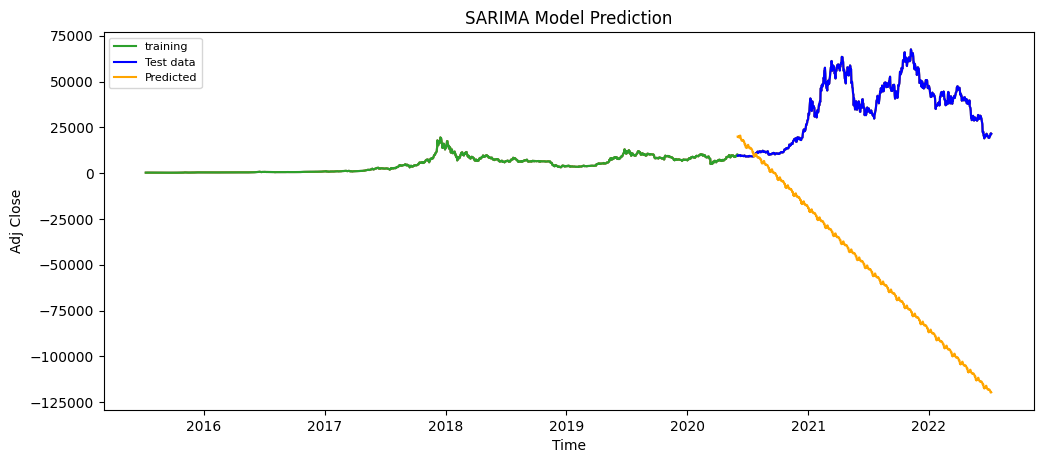

In [39]:
plt.figure(figsize=(12,5), dpi=100)
#plt.figure(figsize=(12,5))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Test data')
plt.plot(predictions, color = 'orange',label='Predicted')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('SARIMA Model Prediction')
plt.xlabel('Time')
plt.ylabel('Adj Close')
plt.legend(loc='upper left', fontsize=8)
#plt.legend(fontsize=8)
plt.show()

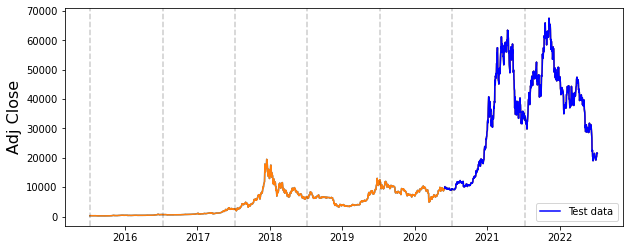

In [40]:
plt.figure(figsize=(10,4))
plt.plot(df.index, df['Adj Close'])
plt.plot(lim_df)

#plt.plot(lim_df[train_end:]['Adj Close'],'blue',label= 'Test data')
plt.plot(lim_df[train_end:],'blue',label= 'Test data')
#plt.plot(test_data)

#plt.plot(predictions)
plt.legend(('Date','Predictions'), fontsize=16)

plt.ylabel('Adj Close', fontsize=16)
for year in range(start_date.year, end_date.year):
  plt.axvline(pd.to_datetime(str(year)+'-07-09'), color='k', linestyle='--', alpha=0.2)

plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test_data, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 99263.553976


In [42]:
mape = np.mean(np.abs(np.array(predictions) - np.array(test_data))/np.abs(test_data))
print('MAPE: ' + str(mape))

MAPE: 2.3107434967912384
